# Erasmus Neural Networks
http://michalbereta.pl/nn
## MNIST database


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### How to save an object (the network) to file with pickle

In [1]:
import numpy as np

class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
############################################################################
import pickle

X = np.loadtxt('data.txt')
labels = X[:,-1].astype('int32')
X = X[:,:-1]
print(X)
print(labels)

print()

net = SoftMaxLinear(2, 3)

(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
print(net.GetPredictions())

print('starting learning...')
counter = 0
max_iters = 100
while True:
    net.Learn(X, labels, 1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter+1)
    print('probs:\n',net.probs)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    print(net.GetPredictions())
    counter += 1
    if counter > max_iters:
        break
    if dloss < 0.01:
        break
print('learning finished')

#save
f = open('my_softmax.net','wb')
pickle.dump(net, f)
f.close()

#load
f = open('my_softmax.net','rb')
net2 = pickle.load(f)
f.close()

#check
(dloss, erate, errors) = net2.Test(X, labels)
print('\n\nafter loading:')
print('probs:\n',net2.probs)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
print(net2.GetPredictions())

#really different objects!
print(id(net))
print(id(net2))


[[0.454 0.89 ]
 [0.37  0.804]
 [0.474 0.788]
 [0.206 0.338]
 [0.18  0.216]
 [0.272 0.258]
 [0.688 0.398]
 [0.614 0.294]
 [0.708 0.306]]
[0 0 0 1 1 1 2 2 2]

dloss: 1.0992303419844034
erate: 0.6666666666666666
errors: 6
[1 1 1 1 1 1 1 1 1]
starting learning...

iteration 1
probs:
 [[0.36824771 0.30345546 0.32829683]
 [0.36488835 0.30715127 0.32796039]
 [0.36406226 0.30519783 0.33073991]
 [0.34640479 0.32084777 0.33274745]
 [0.34160887 0.32405508 0.33433605]
 [0.34314245 0.32104006 0.33581749]
 [0.34799574 0.30863045 0.34337381]
 [0.34401043 0.3124634  0.34352616]
 [0.34430802 0.31008085 0.34561114]]
dloss: 1.068586887428207
erate: 0.5555555555555556
errors: 5
[0 0 0 0 0 0 0 0 2]

iteration 2
probs:
 [[0.39295281 0.28436559 0.32268161]
 [0.38671428 0.29119118 0.32209454]
 [0.38473509 0.28767712 0.32758779]
 [0.35154438 0.31697481 0.33148081]
 [0.34246192 0.32304221 0.33449587]
 [0.34511778 0.31733956 0.33754266]
 [0.35292627 0.29414266 0.35293107]
 [0.34561085 0.30121846 0.35317069]
 [0.

### MNIST database - read some samples

(10000, 785)
<class 'numpy.ndarray'>
float64
(784,)
(28, 28)


<IPython.core.display.Javascript object>


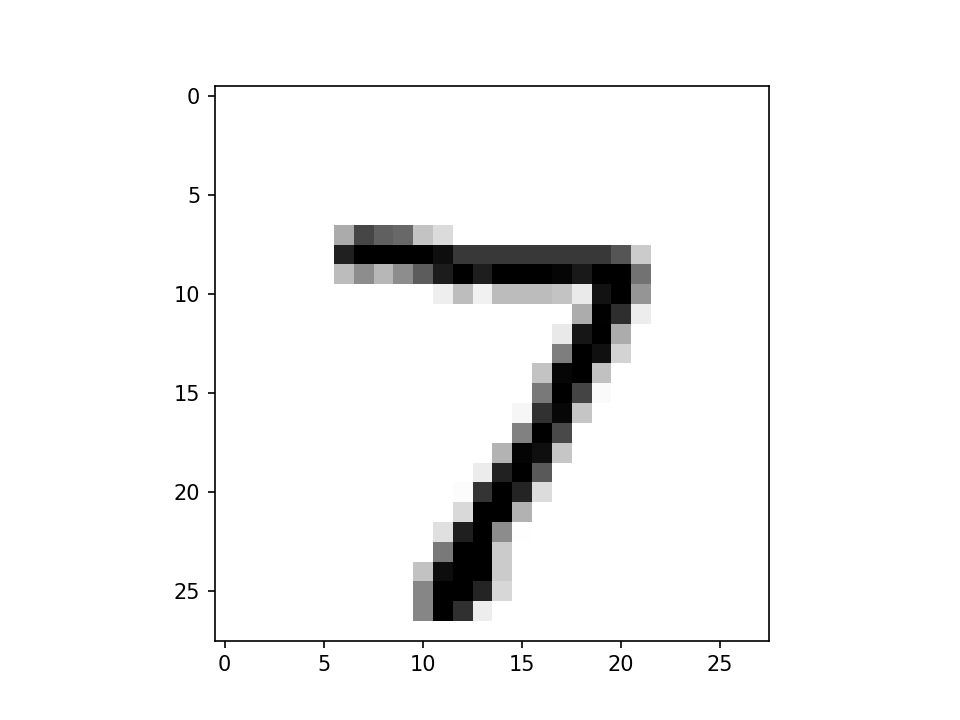

<IPython.core.display.Javascript object>


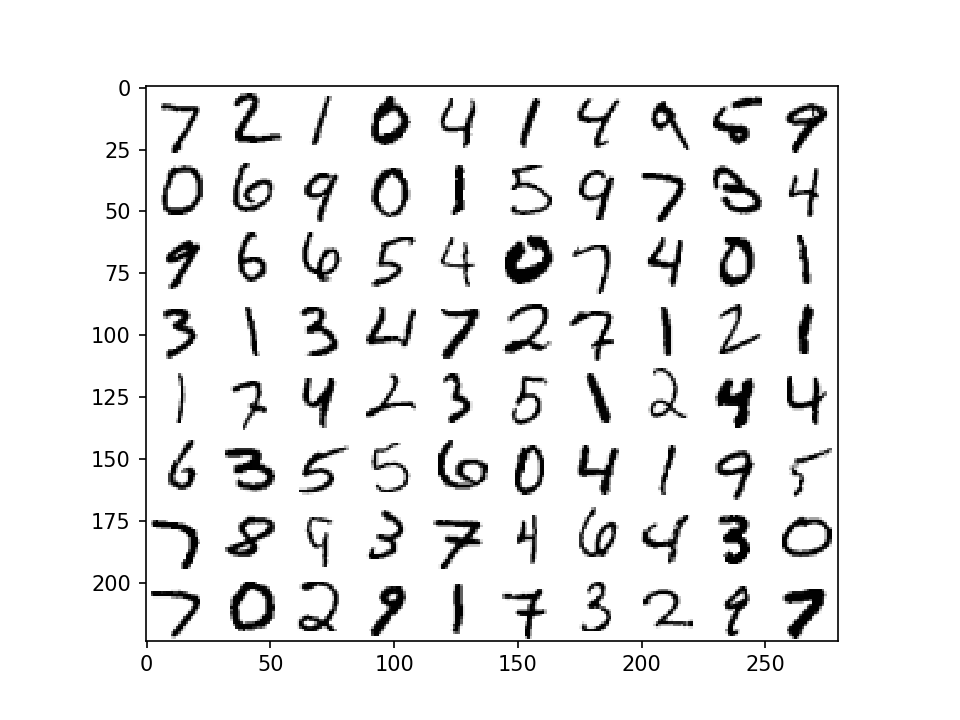

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

data = np.loadtxt('mnist_test.csv', delimiter=',')

print(data.shape)
print(type(data))
print(data.dtype)

#display the first of the images
im = data[0,1:] #the first column contains class label
print(im.shape)
im.shape = (28,28)
print(im.shape)
#print(im)
plt.imshow(im, cmap=plt.cm.binary)



#generate a display of several first images
rows = 8
cols = 10
counter = 0

images = None

for i in range(rows):
    current_row = None
    for j in range(cols):
        im = data[counter,1:].reshape(28,28)
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))
        
plt.figure()
plt.imshow(images, cmap=plt.cm.binary)

plt.show()

### MNIST - example training with Linear SoftMax

Feel free to modify the following code, for example, add the code to save with pickle the network with the currect best results of the test data, so that you can later load it.

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: 2.3019203025262356
erate: 0.9260166666666667
errors: 55561
test dloss: 2.300642360351928
test erate: 0.9289
test errors: 9289
starting learning...

iteration 1
dloss: 2.196253641712907
erate: 0.45686666666666664
errors: 27412
test dloss: 2.193025733321938
test erate: 0.4443
test errors: 4443

iteration 2
dloss: 2.099697783023487
erate: 0.33016666666666666
errors: 19810
test dloss: 2.094679994525903
test erate: 0.316
test errors: 3160

iteration 3
dloss: 2.010491471556965
erate: 0.2879333333333333
errors: 17276
test dloss: 2.003802373107051
test erate: 0.2778
test errors: 2778

iteration 4
dloss: 1.9278075504439376
erate: 0.26638333333333336
errors: 15983
test dloss: 1.9195558286850876
test erate: 0.2579
test errors: 2579

iteration 5
dloss: 1.8511347383942123
erate: 0.2527333333333333
errors: 15164
test dloss: 1.8414271087625407
test erate: 0.2424
test errors: 2424

iteration 6
dloss: 1.7800

<IPython.core.display.Javascript object>


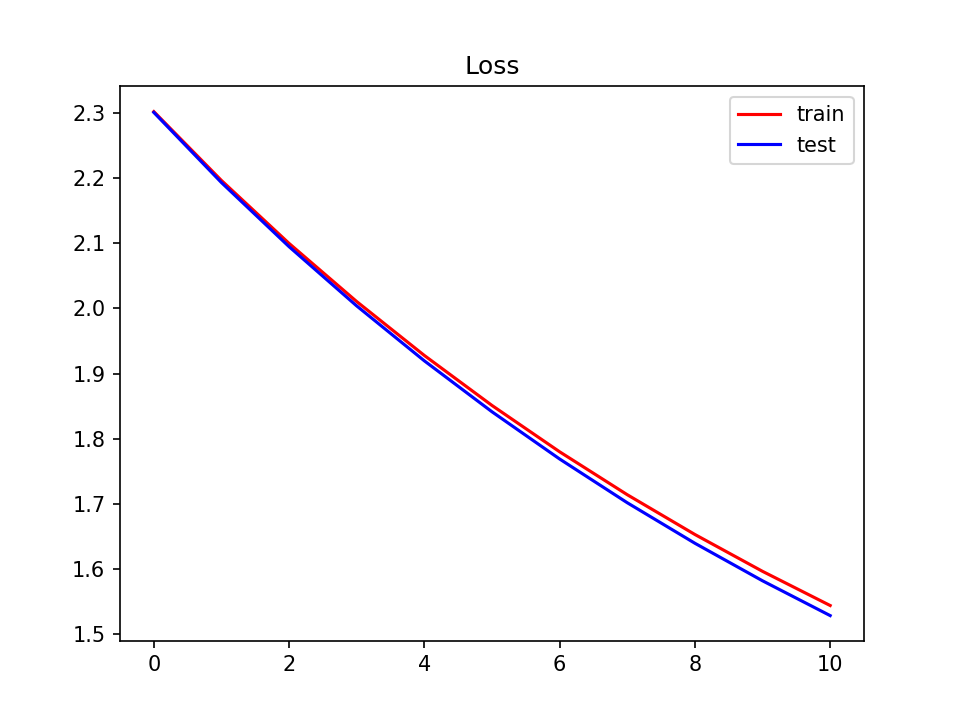

<IPython.core.display.Javascript object>


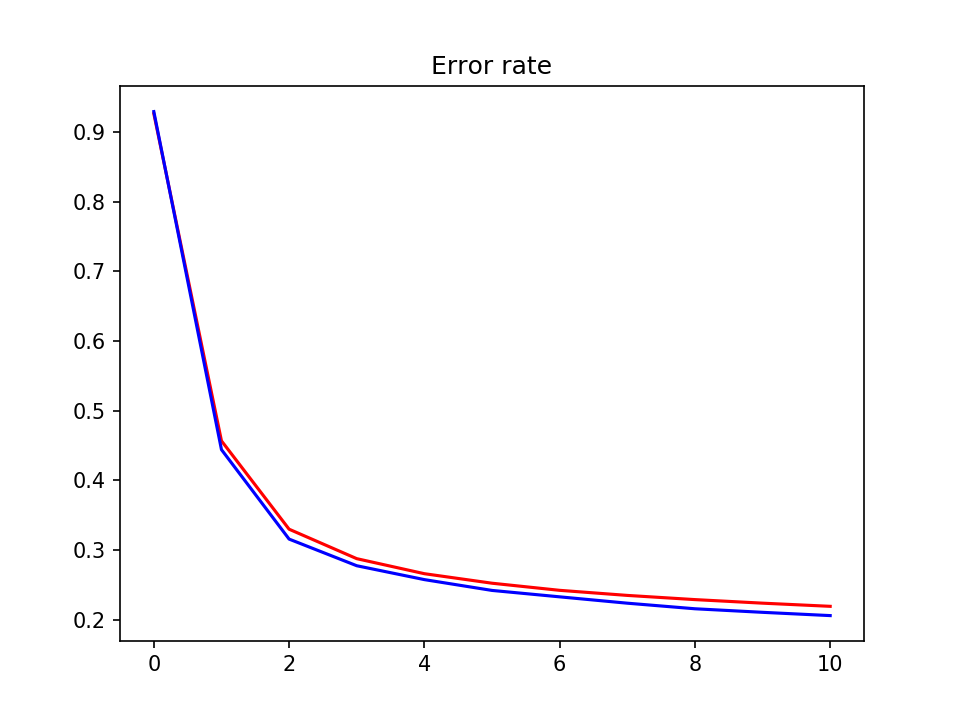

<IPython.core.display.Javascript object>


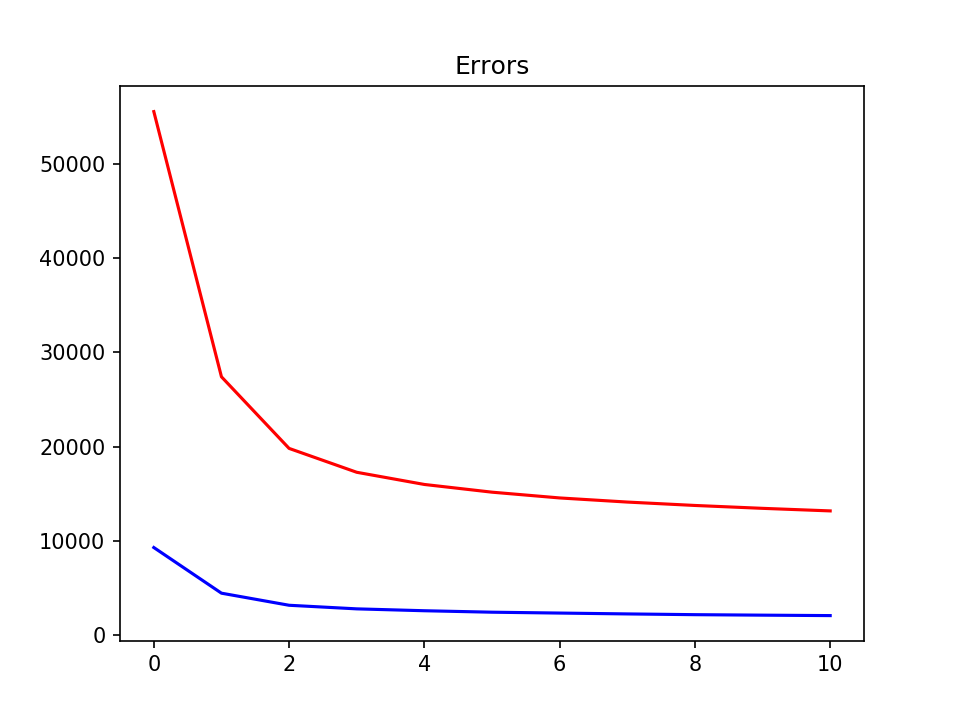

In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

class SoftMaxLinear:
    def __init__(self, inputs_num, outputs_num):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W = (-1 + 2*np.random.rand(inputs_num, outputs_num))/100.0 #neurons as columns
        self.b = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        f = np.dot(X, self.W) + self.b
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases
        dW = np.dot(X.T, dprobs) # chain rule to calculate gradients
        db = np.sum(dprobs, axis=0,keepdims=True)
        #update neurons
        self.W = self.W - lrate*dW
        self.b = self.b - lrate*db
       
        
        


#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = SoftMaxLinear(784, 10) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 10
min_loss = 0.1
while True:
    net.Learn(X, labels, 0.1)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
print('learning finished')

#save
import pickle
f = open('my_softmax_mnist.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()


### Task 1

- Use MLP and SoftMax with hidden layer(s) to train on MNIST, and check how much you can improve over linear SoftMax.

- Does regularization help to improve the test results?

- Prepare a report presenting your results. Send a pdf file with the report. Attach the source codes. Do not attach the databases.

- Send also the saved trained classifiers – check pickle_example to see how to save objects (your nets). Prepare the code to load the saved network and check the test results.


#### YOUR ANSWERS HERE
My results are as follows...-> this time present them in the report in a pdf file.

In [ ]:
#YOUR CODE HERE